In [31]:
# Nelder Nead for Rosenbrock
import math
import numpy as np

In [32]:
def NMOneStep(fCost, simplex, fsimplex):
  n = simplex.shape[1]
  C = np.sum(simplex[:n], axis=0)
  C /= n
  R = 2 * C - simplex[n,:]
  fR = fCost(R)

  if (fR < fsimplex[0]):
    E = 3 * C - 2 * simplex[n,:]
    fE = fCost(E)
    if (fE < fR):
      simplex = np.roll(simplex, 1, axis=0); simplex[0,:] = E
      fsimplex = np.roll(fsimplex, 1, axis=0); fsimplex[0] = fE
      return(simplex, fsimplex)
    else:
      simplex = np.roll(simplex, 1, axis=0); simplex[0,:] = R
      fsimplex = np.roll(fsimplex, 1, axis=0); fsimplex[0] = fR
      return(simplex, fsimplex)
  elif (fR < fsimplex[n-1]):
    simplex[n] = R
    fsimplex[n] = fR
    ind = np.argsort(fsimplex)
    simplex = simplex[ind]
    fsimplex = fsimplex[ind]
    return(simplex, fsimplex)
  elif (fR < fsimplex[n]):
    T = 1.5 * C - 0.5 * simplex[n]
    fT = fCost(T)
    if (fT < fR):
      simplex[n] = T
      fsimplex[n] = fT
      ind = np.argsort(fsimplex)
      simplex = simplex[ind]
      fsimplex = fsimplex[ind]
      return(simplex, fsimplex)
    else:
      simplex[n] = R
      fsimplex[n] = fR
      return(simplex, fsimplex)
  else:
    H = 0.5 * C + 0.5 * simplex[n]
    fH = fCost(H)
    if (fH < fsimplex[n]):
      simplex[n] = H
      fsimplex[n] = fH
      ind = np.argsort(fsimplex)
      simplex = simplex[ind]
      fsimplex = fsimplex[ind]
      return(simplex, fsimplex)
    else:
      simplex_c = .5 * simplex[0] + .5 * simplex
      fsimplex_c = np.zeros(n+1)
      for i in range(n+1):
        fsimplex_c[i] = fCost(simplex_c[i,:])
      ind_c = np.argsort(fsimplex_c)
      fsimplex_c = fsimplex_c[ind_c]
      simplex_c = simplex_c[ind_c]
      return(simplex_c, fsimplex_c)

In [33]:
def NM(fCost, x0, epsilon, maxit):
  n = x0.shape[0]
  icount=0
  simplex = np.zeros((n+1,n))
  simplex[0,:] = x0
  for i in range(n):
    simplex[i+1,:] = x0
    simplex[i+1, i] += 1/10
  fsimplex = np.zeros(n+1)
  for i in range(n+1):
    fsimplex[i] = fCost(simplex[i,:])
  ind = np.argsort(fsimplex)
  fsimplex = fsimplex[ind]
  simplex = simplex[ind]
  err = 1
  it = 0

  while (err > epsilon and it < maxit):
    icount=icount+1
    list_x[icount-1] = simplex[0]
    simplex, fsimplex = NMOneStep(fCost, simplex, fsimplex)
    it += 1
    err = fsimplex[0]
  return(simplex[0], err, it)

In [34]:
def Rosenbrock(X):
    x = X[0]
    y = X[1]
    return 100*(y-x**2)**2+(x-1)**2

In [35]:
N=20000
list_x = [0]*N
X0=np.array([-1.2,1])
n=2
maxit=1000
list_x = [0]*maxit
epsilon=1e-6
x0=np.array([-2,2.1])
Sbest, err, it=NM(Rosenbrock, x0, epsilon, maxit)
print ('variable values = ', Sbest)
print ('evaluation number = ', it)
list_x=list_x[0:it]
N=it

variable values =  [ 1.00045916  1.00095625]
evaluation number =  110


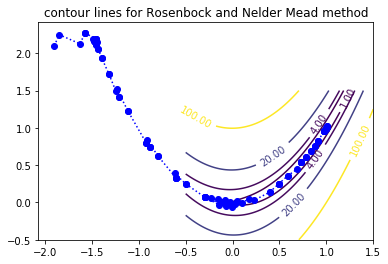

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def RosenbrockB(x,y):
    return 100*(y-x**2)**2+(x-1)**2

x, y = np.meshgrid(np.linspace(-0.5,1.5, 200), np.linspace(-0.5,1.5, 200))
z = RosenbrockB(x,y)
graphe = plt.contour(x,y,z,[1, 4,20,100])

xk_1 = [list_x[k][0] for k in range(N)] 
xk_2 = [list_x[k][1] for k in range(N)]
plt.plot(xk_1, xk_2, "b:o") #x_k pour methode pattern search

plt.clabel(graphe,inline=1,fontsize=10,fmt='%3.2f')
plt.title("contour lines for Rosenbock and Nelder Mead method")
plt.show()
